# Introduction into Data Science - Assignment Part II

This is the second part of the assignment in IDS 2023/2024.

This part of the assignment consists of five questions — each of these questions is contained in a separate Jupyter notebook:
- [Question 1: Data Preprocessing](Q1_Preprocessing_Visualization.ipynb)
- [Question 2: Association Rules](Q2_Frequent_Itemsets_Association_Rules.ipynb)
- [Question 3: Process Mining](Q3_Process_Mining.ipynb)
- [Question 4: Text Mining](Q4_Text_Mining.ipynb)
- [Question 5: Big Data](Q5_Big_Data.ipynb)

Additional required files are in two folders.
- [datasets](datasets/)
- [scripts](scripts/)

Please use the provided notebook to work on the questions. When you are done, upload your version of each of the notebooks to Moodle. Your submission will, therefore, consist of five jupyter notebook and _no_ additional file. Any additionally provided files will not be considered in grading.
Enter your commented Python code and answers in the corresponding cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. Please **DO NOT CLEAR THE OUTPUT** of the notebook you are submitting! Additionally, please ensure that the code in the notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the provided slots in each of the notebooks.* If a name or a student id is missing, the student will not receive any points.

Hint 1: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 2: RWTHMoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

Hint 3: As a technical note. Some IDEs such as DataSpell may automatically strip jupyter notebook cell metadata. If you are able, please re-add it from the source notebooks before submission. This is necessary for our grading.

Enter your group number and members with matriculation numbers below.

In [ ]:
GROUP_NO = 123 # group number
GROUP_MEMBERS = {
    123456: "firstname lastname", # mat. no. : name,
    234567: "firstname lastname",
    345678: "firstname lastname",
}

---

In [2]:
# required imports
# do not edit!

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Question 1: Preprocessing and Visualization (19 Points)

**About the Data: Heart Disease**

In this task, our data (`q1_heart_disease.csv`) contains records related to the diagnosis of heart disease in patients. It includes various clinical and non-clinical attributes used to determine the presence or absence of heart disease. Columns cover aspects like patient demographics, vital signs, symptoms, and potential risk factors associated with heart conditions. See below a short description for each column.

| Column         | Description                                                                                                                       |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| Age            | The age of the patient in years.                                                                                                  |
| Sex            | The sex of the patient.                                                                                                           |
| ChestPainType  | The type of chest pain (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomnic).                       |
| RestingBP      | The resting blood pressure in millimeter of mercury [mmHg].                                                                       |
| Cholesterol    | The cholesterol of the blood serum in milligrams per deciliter (mg/dl).                                                           |
| FastingBS      | 1 if the blood sugar while fasting is above 120 mg/dl, 0 otherwise.                                                               |
| RestingECG     | Results of the electrocardiogram when resting.                                                                                    |
| MaxHR          | The maximum heart rate achieved while exercising.                                                                                 |
| ExerciseAngina | If an Angina (pressure on chest) is inducible by exercising.                                                                      |
| Oldpeak        | Numerical measure of the depression of the ST segment of electrocardiogram induced by exercise relative to rest.                  |
| ST_Slope       | The slope of the peak exercise ST segment, where 0 corresponds to downsloping; 1 to a flat level, and 2 corresponds to upsloping. |
| HeartDisease   | Heart disease being present or not.                                                                                               |

## Part I: Preprocessing (11 pts)

### a)
First things first. Import the file **q1_heart_disease.csv** and save it into a dataframe named `heart_df`. Visualize the dataframe by showing the first five lines. 


In [33]:
# Import and visualization.
heart_df = pd.read_csv('datasets/q1_heart_disease.csv')
print(heart_df.head())

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA      140.0        289.0        0.0     Normal   
1  49.0   F           NAP      160.0        180.0        0.0     Normal   
2  37.0   M           ATA      130.0        283.0        0.0         ST   
3  48.0   F           ASY      138.0        214.0        0.0     Normal   
4  54.0   M           NAP      150.0        195.0        0.0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0  172.0              N      0.0       Up           0.0  
1  156.0              N      1.0     Flat           1.0  
2   98.0              N      0.0       Up           0.0  
3  108.0              Y      1.5     Flat           1.0  
4  122.0              N      0.0       Up           0.0  


### b) 
i. Check the data types. Are there any data type problems (e.g., numerical columns having a non-numerical data type)?

In [4]:
# Visualizing data types
print(heart_df.dtypes)

Age               float64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR             float64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object


ii. Fix problems, if there are any data type problems. Further, improve categorical columns by setting them to the categorical type and translate boolean columns to boolean values.

In [ ]:
# Fixing problems, if necessary
# Not Necessary

In [34]:
# Set categorical columns to categori*c*al type.
categorical_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
heart_df[categorical_columns] = heart_df[categorical_columns].astype('category')

In [35]:
# Translate boolean columns to boolean type
boolean_columns = ['FastingBS', 'HeartDisease']
heart_df[boolean_columns] = heart_df[boolean_columns].astype(bool)
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].map({'Y': True, 'N': False})
heart_df['ExerciseAngina'] = heart_df['ExerciseAngina'].astype(bool)

In [43]:
# Checking again by visualizing data types
display(heart_df.head())
print(heart_df.dtypes)

,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_False,FastingBS_True,ExerciseAngina_False,ExerciseAngina_True,HeartDisease_False,HeartDisease_True
0,40.0,M,140.0,289.0,172.0,0.0,False,True,False,False,...,False,False,False,True,True,False,True,False,True,False
1,49.0,F,160.0,180.0,156.0,1.0,False,False,True,False,...,False,False,True,False,True,False,True,False,False,True
2,37.0,M,130.0,283.0,98.0,0.0,False,True,False,False,...,True,False,False,True,True,False,True,False,True,False
3,48.0,F,138.0,214.0,108.0,1.5,True,False,False,False,...,False,False,True,False,True,False,False,True,False,True
4,54.0,M,150.0,195.0,122.0,0.0,False,False,True,False,...,False,False,False,True,True,False,True,False,True,False


Age                     float64
Sex                      object
RestingBP               float64
Cholesterol             float64
MaxHR                   float64
Oldpeak                 float64
ChestPainType_ASY          bool
ChestPainType_ATA          bool
ChestPainType_NAP          bool
ChestPainType_TA           bool
RestingECG_LVH             bool
RestingECG_Normal          bool
RestingECG_ST              bool
ST_Slope_Down              bool
ST_Slope_Flat              bool
ST_Slope_Up                bool
FastingBS_False            bool
FastingBS_True             bool
ExerciseAngina_False       bool
ExerciseAngina_True        bool
HeartDisease_False         bool
HeartDisease_True          bool
dtype: object


### c)
i. In this subtask, we start with a first evaluation of our data by checking the plausibility of some entries. To make sure that we do not have a clash between intended NaN values and existing NaN values in the dataset, we first remove all NaN values. Report the number of rows containing a NaN value.

In [37]:
nan_rows = heart_df.isnull().any(axis=1).sum()
heart_df = heart_df.dropna()
nan_rows_post = heart_df.isnull().any(axis=1).sum()
print(f"Number of rows containing NaN values before removal: {nan_rows}")
print(f"Number of rows containing NaN values after removal: {nan_rows_post}")

Number of rows containing NaN values before removal: 2
Number of rows containing NaN values after removal: 0


ii. To check plausibility, create boxplots for all numerical features. Reason which features have invalid or missing values. Show and report such outliers. 

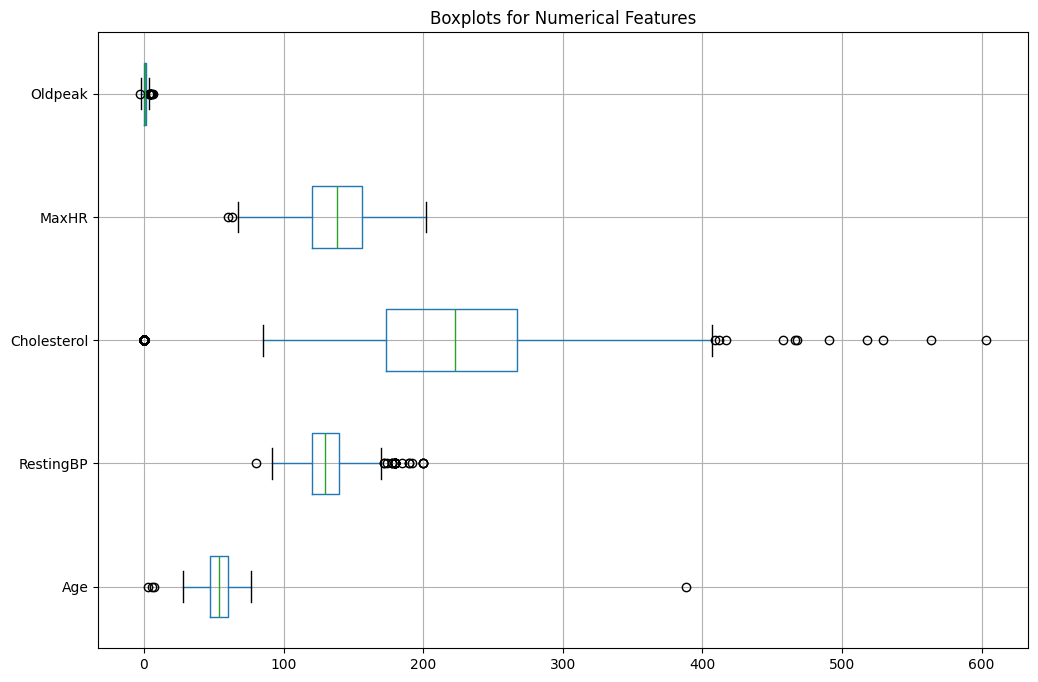

In [10]:
# Creating the boxplot and calculating outliers
numnum = heart_df.select_dtypes(include=['float64']).columns
heart_df[numnum].boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplots for Numerical Features')
plt.show()

_Note: There may be more cells than what you may need for viewing and reporting the entries properly and nicely._

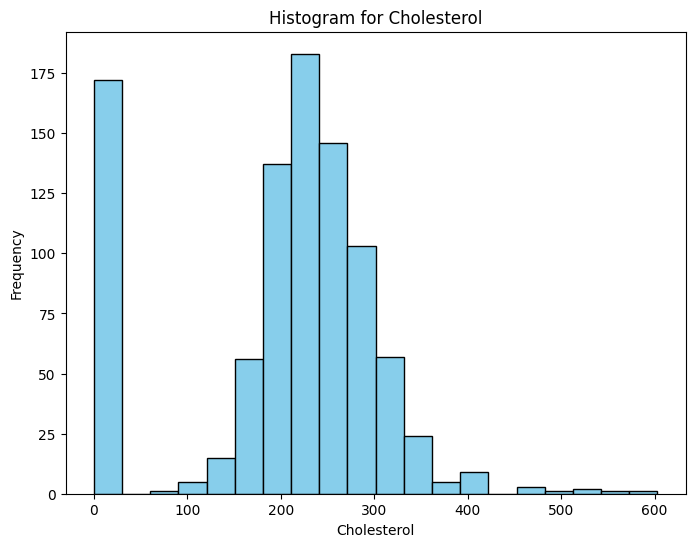

In [17]:
# Potential viewing and reporting of outlier entries
column_to_view= 'Cholesterol'
column_data_type = heart_df[column_to_view].dtype
plt.figure(figsize=(8, 6))
plt.hist(heart_df[column_to_view].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram for {column_to_view}')
plt.xlabel(column_to_view)
plt.ylabel('Frequency')
plt.show()

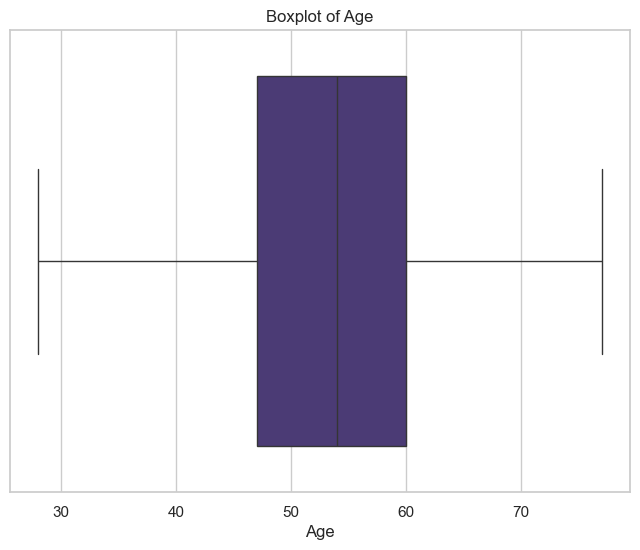

In [25]:
# Potential viewing and reporting of outlier entries
feature = 'Age' 
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart_df[feature])
plt.xlabel(feature)
plt.title(f'Boxplot of {feature}')
plt.show()

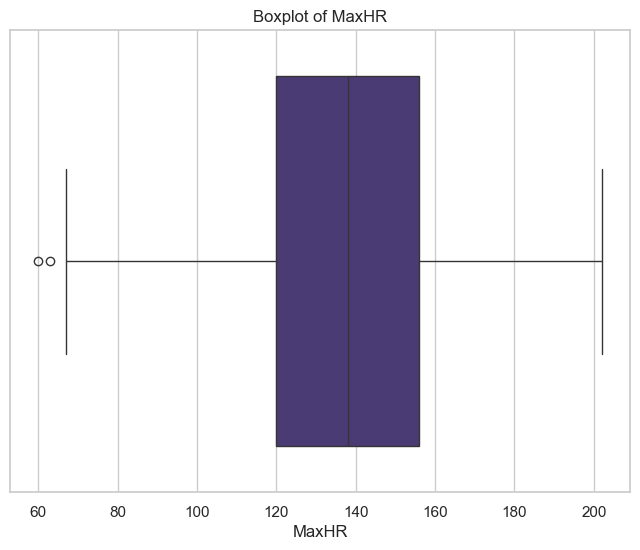

In [20]:
# Potential viewing and reporting of outlier entries
feature = 'MaxHR' 
sns.set(style='whitegrid', palette='viridis')
plt.figure(figsize=(8, 6))
sns.boxplot(x=heart_df[feature])
plt.xlabel(feature)
plt.title(f'Boxplot of {feature}')
plt.show()

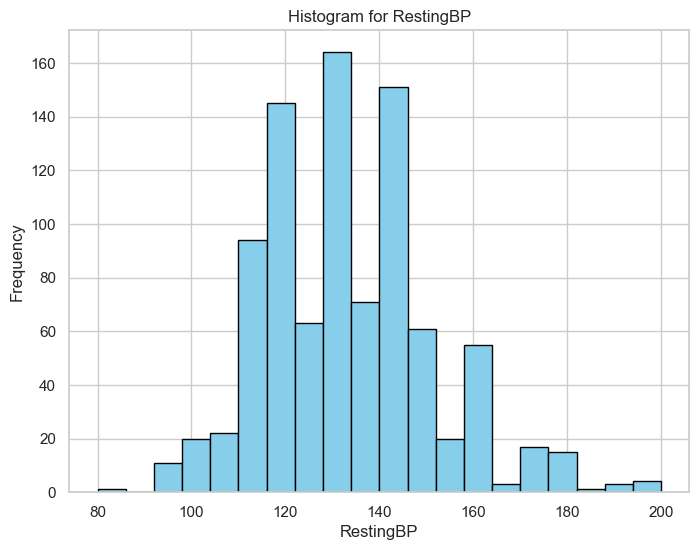

In [21]:
# Potential viewing and reporting of outlier entries
column_to_view= 'RestingBP'
column_data_type = heart_df[column_to_view].dtype
plt.figure(figsize=(8, 6))
plt.hist(heart_df[column_to_view].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histogram for {column_to_view}')
plt.xlabel(column_to_view)
plt.ylabel('Frequency')
plt.show()

iii. Decide and briefly reason which entries can be kept such that some values can be imputed later and which entries have to be deleted. Apply the preprocessing by either deleting entries or by replacing values that should be imputed by setting their value to NaN respectively. Report for both processings how many entries are effected.

__Student Answer:__ According to modern medicinal inquiries into adult health markers, certain magnitudes of these markers are not within natural human bounds. The olded recorded human to ever live reached the maximum age of 122, furthermore blood pressure below and above 95mmHg and 180mmHg are indicative of quietus. Hence The age of 400, cholesterol above 430, Resting BPs above and below 95 and 180, should be removed. Whereas the MaxHR values below 70 should be imputed.

In [23]:
# Potential removing of outliers, reporting their number, and showing of the resulting dataframe
feature = 'Age'
mean_value = heart_df[feature].mean()
std_dev = heart_df[feature].std()
z_scores = (heart_df[feature] - mean_value) / std_dev
outliers = (z_scores > 3)
num_outliers = sum(outliers)
print(f"Number of outliers in {feature}: {num_outliers}")
heart_df = heart_df[~outliers]
display(heart_df)

Number of outliers in Age: 4


,Age,Sex,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,...,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_False,FastingBS_True,ExerciseAngina_True,HeartDisease_False,HeartDisease_True
0,40.0,M,140.0,289.0,172.0,0.0,False,True,False,False,...,True,False,False,False,True,True,False,True,True,False
1,49.0,F,160.0,180.0,156.0,1.0,False,False,True,False,...,True,False,False,True,False,True,False,True,False,True
2,37.0,M,130.0,283.0,98.0,0.0,False,True,False,False,...,False,True,False,False,True,True,False,True,True,False
3,48.0,F,138.0,214.0,108.0,1.5,True,False,False,False,...,True,False,False,True,False,True,False,True,False,True
4,54.0,M,150.0,195.0,122.0,0.0,False,False,True,False,...,True,False,False,False,True,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,45.0,M,110.0,264.0,132.0,1.2,False,False,False,True,...,True,False,False,True,False,True,False,True,False,True
919,68.0,M,144.0,193.0,141.0,3.4,True,False,False,False,...,True,False,False,True,False,False,True,True,False,True
920,57.0,M,130.0,131.0,115.0,1.2,True,False,False,False,...,True,False,False,True,False,True,False,True,False,True
921,57.0,F,130.0,236.0,174.0,0.0,False,True,False,False,...,False,False,False,True,False,True,False,True,False,True


In [ ]:
# Potential replacing of values with NaN, reporting their number, and showing of the resulting dataframe


iv. To give yourself a better insight, plot the resulting dataframe again using boxplots.

In [ ]:
# Creating a boxplot
heart_df.boxplot(figsize=(12, 8), vert=False)
plt.title('Boxplots for Numerical Features')
plt.show()

### d)
In this task, we apply one-hot encoding for all categorical and all boolean features. This is used later for visualization. Afterwards, show the resulting dataframe.

In [60]:
# Replacing categorical and boolean features with one-hot encoded columns
categorical_columns = heart_df.select_dtypes(include=['category']).columns
boolean_columns = heart_df.select_dtypes(include=['bool']).columns
to_encode = list(categorical_columns) + list(boolean_columns)
heart_df = pd.get_dummies(heart_df, columns=to_encode)
print(heart_df.head())

    Age Sex  RestingBP  Cholesterol  MaxHR  Oldpeak  ChestPainType_ASY_False  \
0  40.0   M      140.0        289.0  172.0      0.0                     True   
1  49.0   F      160.0        180.0  156.0      1.0                     True   
2  37.0   M      130.0        283.0   98.0      0.0                     True   
3  48.0   F      138.0        214.0  108.0      1.5                    False   
4  54.0   M      150.0        195.0  122.0      0.0                     True   

   ChestPainType_ASY_True  ChestPainType_ATA_False  ChestPainType_ATA_True  \
0                   False                    False                    True   
1                   False                     True                   False   
2                   False                    False                    True   
3                    True                     True                   False   
4                   False                     True                   False   

   ...  FastingBS_True_False  FastingBS_True_True 

### e)
i. In this task, we want to impute missing values based on their k-nearest neighbor. Therefore, as a first step, create a reduced dataframe that contains the column(s) with missing values and with columns that correlate with the missing value. To decide which features (weakly) correlate, consider the correlation matrix in the figure below that is taken from literature (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/). Consider all features that have an absolute value for the correlation coefficient of at least 0.1 with the missing value.

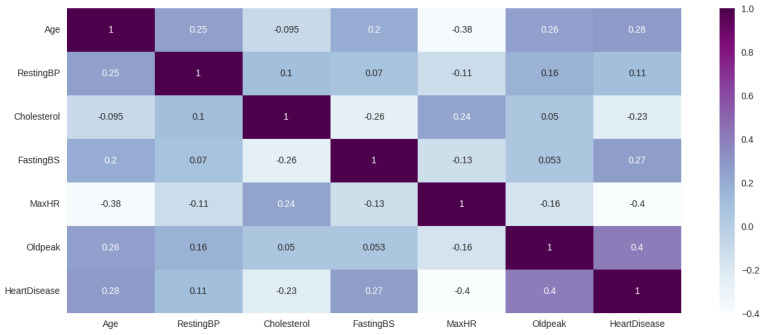

Figure 1: Correlation matrix between different features from Literature. (Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10417090/)

In [27]:
# Creating a dataframe with the values to be imputed and the correlating columns
features = ['RestingBP']
mean_value = heart_df[features].mean()
std_dev = heart_df[features].std()
z_scores = (heart_df[features] - mean_value) / std_dev
outliers = (z_scores > 3) | (z_scores < -3)
display(outliers)

,RestingBP
0,False
1,False
2,False
3,False
4,False
...,...
918,False
919,False
920,False
921,False


__Student Answer:__ _your answer goes here_

ii. Next, use k-nearest neighbor imputation with $k = 5$. Impute the missing values. Update the dataframe `heart_df`.

In [ ]:
# Applying k-nearest neighbor imputation
imputation_df = heart_df[missing]
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Updating the imputed column(s)
heart_df = pd.DataFrame(knn_imputer.fit_transform(imputation_df), columns=missing)
print(heart_df.head())

## Part II: Advanced Visualization (8 pts)

In this question, we continue using the preprocessed data from Part I.

### a)
In this task, visualize the relation by plotting each pair of numerical features. Visualize the instances in the pairplots of those individuals that have and that do not have heart disease.

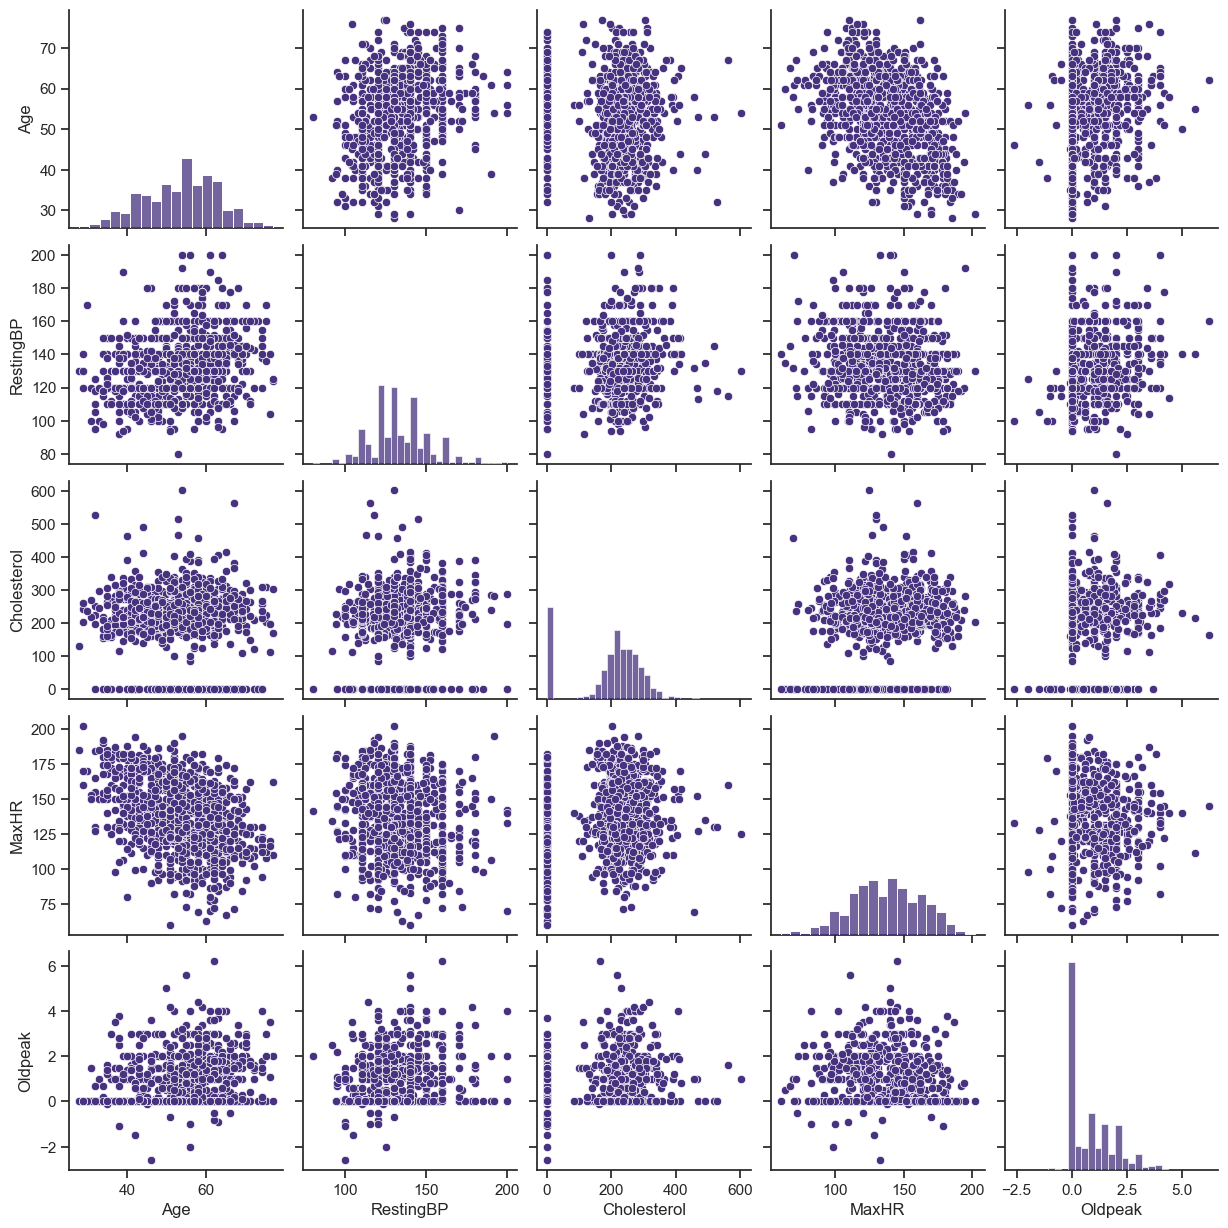

In [28]:
# Visualizing the relation between the numerical values using a pairplot, where the entries are classified by whether a heart disease is present 
numnum = heart_df.select_dtypes(include=['float64']).copy()
sns.set(style='ticks', palette='viridis')
pairplot = sns.pairplot(numnum, markers='o')
plt.show()

### b)
i. Having the pairplot, we are interested in more details on the relation between the age of a patient and maximum heart rate. Therefore, create plot that shows the regression line between both features.

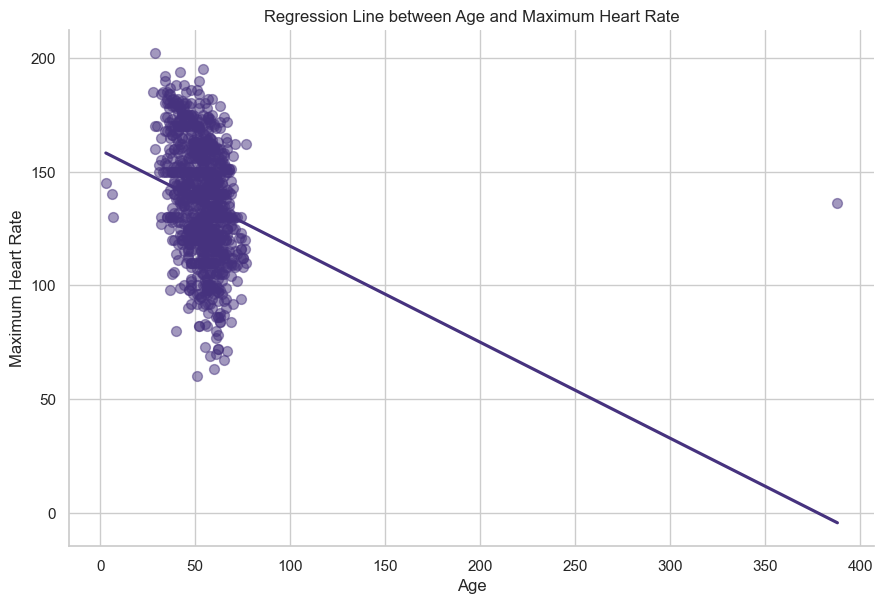

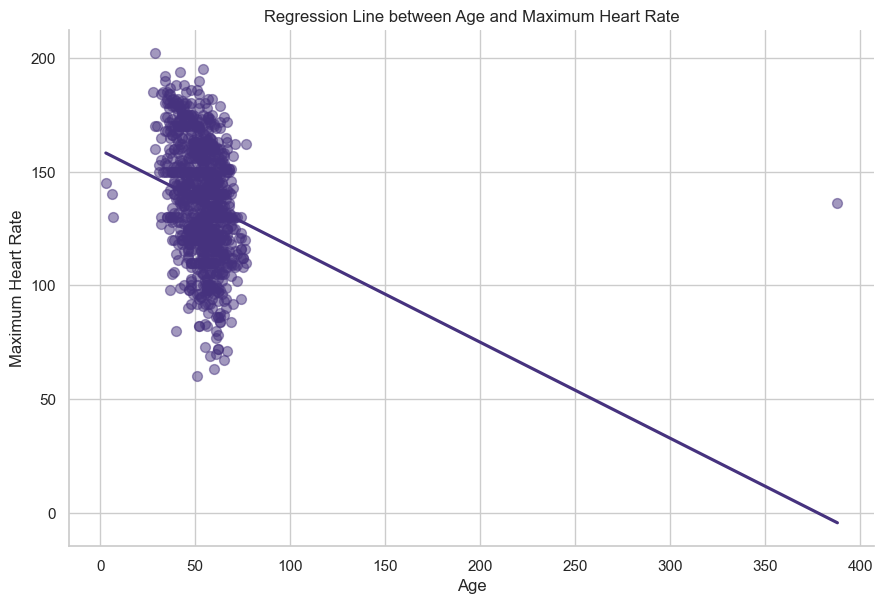

In [28]:
# Plotting age and maximum heart rate with regression line
sns.set(style='whitegrid', palette='viridis')
sns.lmplot(x='Age', y='MaxHR', data=heart_df, height=6, aspect=1.5, ci=None, scatter_kws={'s': 50, 'alpha': 0.5})
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Regression Line between Age and Maximum Heart Rate')
plt.show()

ii. Given our evaluation from task b-i), we are not sure if Simpson's Paradox occurs or not. Give some short reasoning, and if needed, do some experiment to check whether Simpson's Paradox occurs.

In [66]:
# Potential code for Simpson's Paradox testing
g = sns.FacetGrid(data, col="Group", hue="Group", col_wrap=2, height=5)
g.map(sns.scatterplot, "X", "Y", alpha=.7)

ValueError: Could not interpret value `group` for `hue`. An entry with this name does not appear in `data`.

C:\Users\Rami\AppData\Local\Temp\ipykernel_12800\3900602737.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=heart_df, x='Age', y='MaxHR', palette='viridis')


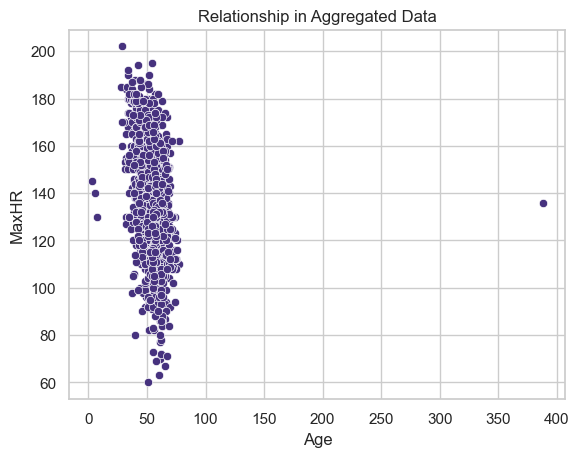

In [64]:
# Potential code for Simpson's Paradox testing
sns.scatterplot(data=heart_df, x='Age', y='MaxHR', palette='viridis')
plt.title('Relationship in Aggregated Data')
plt.show()

__Student Answer:__ _your answer goes here_

### c)
In this task, we want to obtain a deeper understanding of the characteristics of each state of the former categorical or boolean features. Therefore, we create a heatmap that can be used to get a first impression of which value of which feature correlates with each other feature. 

i. Create a dataframe that contains as its columns the feature states and as its index all the column names of `heart_df`. Each entry is the sum of entries that have such a combination of features being true for the one-hot encoded features. For example, given the entries:
| ID | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|----|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| 1  | True          | False          | True            | False           | False           | True            | False           |
| 2  | True          | False          | False           | True            | False           | True            | False           |
| 3  | False         | True           | False           | True            | False           | True            | False           |

In this example, we would obtain the following entries as a result:

|                 | Feature1_True | Feature1_False | Feature2_StateA | Feature2_StateB | Feature2_StateC | Feature3_StateA | Feature3_StateB |
|-----------------|---------------|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| Feature1_True   | 2             | 0              | 1               | 1               | 0               | 2               | 0               |
| Feature1_False  | 0             | 1              | 0               | 1               | 0               | 1               | 0               |
| Feature2_StateA | 1             | 0              | 1               | 0               | 0               | 1               | 0               |
| Feature2_StateB | 1             | 1              | 0               | 2               | 0               | 2               | 0               |
| Feature2_StateC | 0             | 0              | 0               | 0               | 0               | 0               | 0               |
| Feature3_StateA | 2             | 1              | 1               | 2               | 0               | 3               | 0               |
| Feature3_StateB | 0             | 0              | 0               | 0               | 0               | 0               | 0               |

In [55]:
# Creating the data for the heatmap.
onehot_columns = heart_df.select_dtypes(include=[bool]).columns
feature_states_dfamerica = pd.DataFrame(index=onehot_columns, columns=onehot_columns)
for column in onehot_columns:
    for index_column in onehot_columns:
        group_counts = heart_df.groupby([column, index_column]).size().unstack().fillna(0)
        feature_states_dfamerica.loc[column, index_column] = group_counts.iloc[1, 1]


display(feature_states_dfamerica)


,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS_False,FastingBS_True,ExerciseAngina_False,ExerciseAngina_True,HeartDisease_False,HeartDisease_True
ChestPainType_ASY,499.0,0.0,0.0,0.0,102,286,111,47,318,134,356,143,202,297,106,393
ChestPainType_ATA,0.0,174.0,0.0,0.0,23,124,27,3,33,138,154,20,157,17,149,25
ChestPainType_NAP,0.0,0.0,202.0,0.0,47,122,33,10,87,105,161,41,151,51,131,71
ChestPainType_TA,0.0,0.0,0.0,46.0,16,22,8,4,22,20,33,13,40,6,26,20
RestingECG_LVH,102,23,47,16,188.0,0.0,0.0,17,97,74,146,42,115,73,82,106
RestingECG_Normal,286,124,122,22,0.0,554.0,0.0,32,266,256,441,113,347,207,268,286
RestingECG_ST,111,27,33,8,0.0,0.0,179.0,15,97,67,117,62,88,91,62,117
ST_Slope_Down,47,3,10,4,17,32,15,64.0,0.0,0.0,38,26,23,41,14,50
ST_Slope_Flat,318,33,87,22,97,266,97,0.0,460.0,0.0,331,129,188,272,79,381
ST_Slope_Up,134,138,105,20,74,256,67,0.0,0.0,397.0,335,62,339,58,319,78


ii. Next, create the heatmap based on the data from the last subtask. If necessary, improve readability of the visualization.

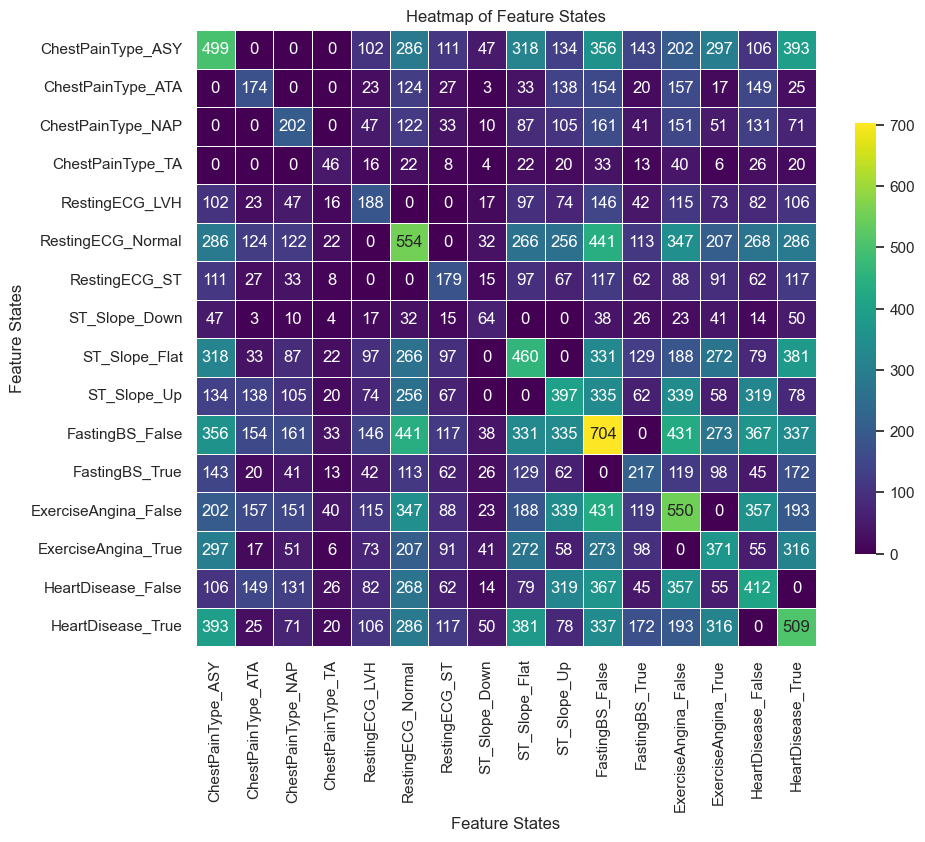

In [57]:
# Visualizing the obtained heatmap
feature_states_dfamerica = feature_states_dfamerica.apply(pd.to_numeric, errors='coerce')
feature_states_dfamerica = feature_states_dfamerica.dropna()
feature_states_df = feature_states_dfamerica.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(feature_states_dfamerica, annot=True, fmt=".0f", cmap="viridis", linewidths=.5, cbar_kws={"shrink": 0.7})
plt.xlabel('Feature States')
plt.ylabel('Feature States')
plt.title('Heatmap of Feature States')
plt.show()

Given the heatmap, briefly derive some insights towards the different values of a feature. I.e., you may choose a heart disease being present or not and argue about what correlates for the other features for each value.

__Student Answer:__ _your answer goes here_